In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


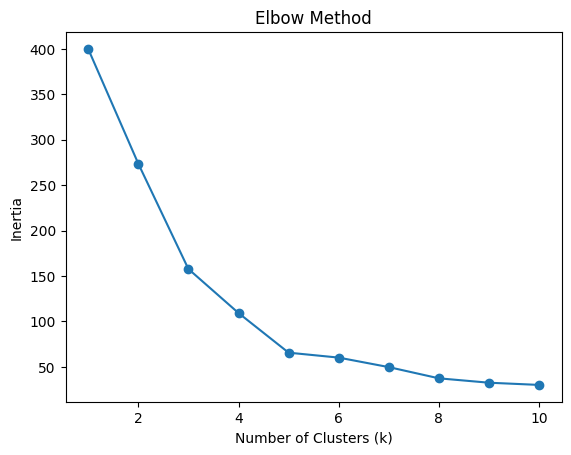

In [41]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


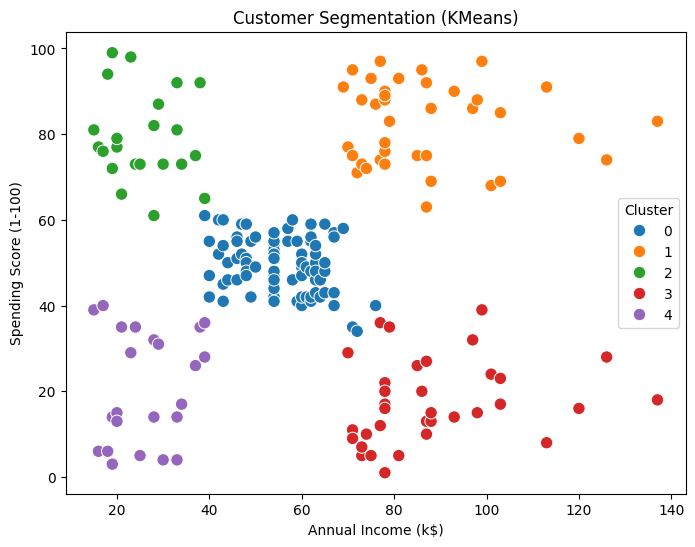

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='tab10', s=80)
plt.title("Customer Segmentation (KMeans)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


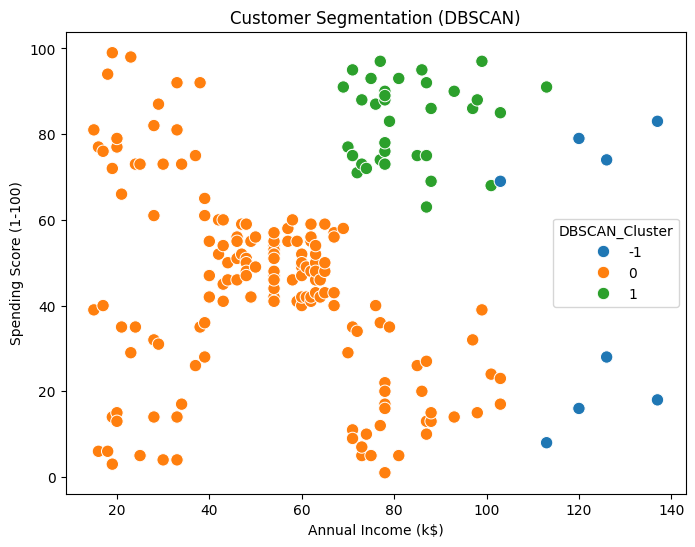

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = db_clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'], palette='tab10', s=80)
plt.title("Customer Segmentation (DBSCAN)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()



Average Spending Score per Cluster:
Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


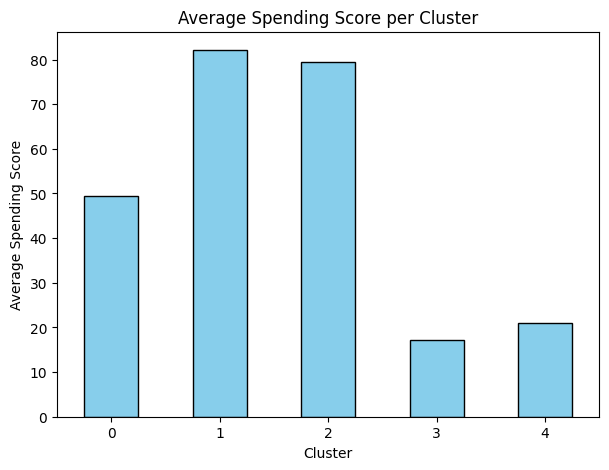

In [44]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Cluster:")
print(avg_spending)

plt.figure(figsize=(7,5))
avg_spending.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.show()